<a href="https://colab.research.google.com/github/gis-rs/Deep-Learning/blob/main/Lake_detection_by_segmentation_in_Satellite_Imagery2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation of Waterbody in Satellite Image

To use GPU runtime go to `Runtime` -> `Change runtime type` and select `T4 GPU
 ` as the hardware accelerator.

## Install dependencies

In [ ]:
%pip install segment-geospatial groundingdino-py leafmap localtileserver

In [2]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

## Create an interactive map

In [3]:
m = leafmap.Map(center=[34.040984, -118.491668], zoom=14, height="600px")
m.add_basemap("SATELLITE")
m

Map(center=[34.040984, -118.491668], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

## Download Image

Select the area of interest

In [4]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-118.4932, 34.0404, -118.4903, 34.0417]

In [ ]:
image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=11, source="Satellite", overwrite=True)

You can also use your own image.

In [ ]:
# image = '/path/to/your/own/image.tif'

Display the downloaded image on the map.

In [6]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=23517.0, center=[46.4962, 60.7358], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoo…

## Initialize LangSAM class

In [7]:
sam = LangSAM()

GroundingDINO_SwinB.cfg.py: 0.00B [00:00, ?B/s]

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:45<00:00, 56.2MB/s]


## Text prompts

In [8]:
text_prompt = "lake"

## Segment the image

In [9]:
sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)

## Visualize the results  with bounding boxes on the map.

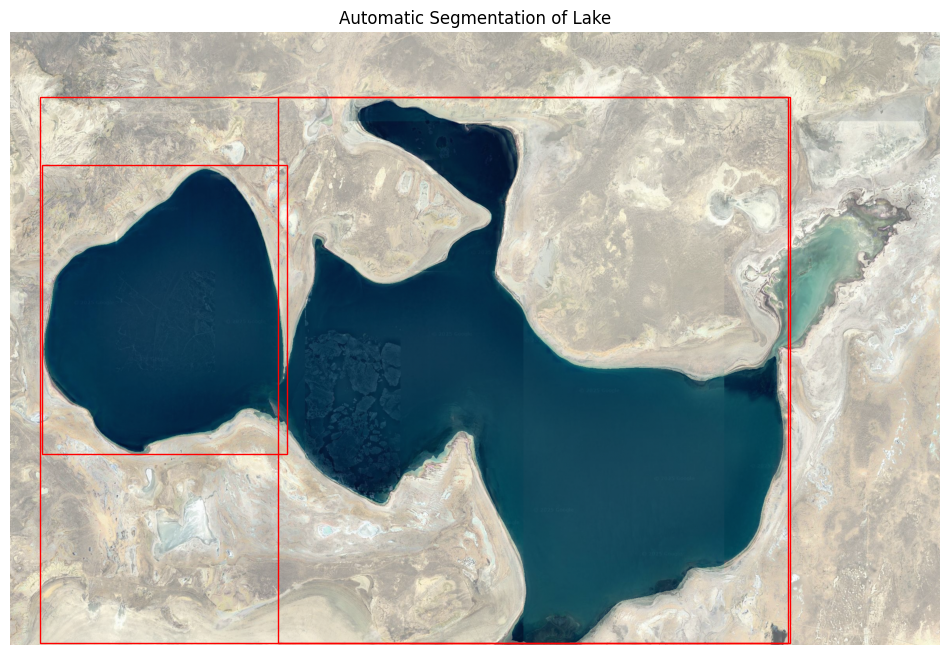

In [10]:
sam.show_anns(
    cmap="Blues",
    box_color="red",
    title="Automatic Segmentation of Lake",
    blend=True,
)

Show the result without bounding boxes on the map.

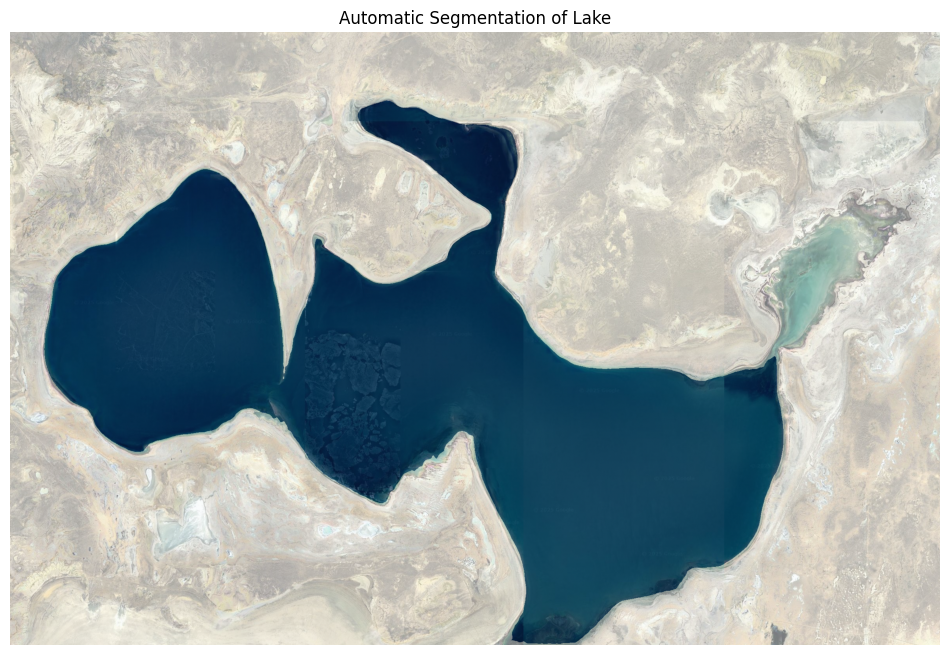

In [11]:
sam.show_anns(
    cmap="Blues",
    add_boxes=False,
    alpha=0.5,
    title="Automatic Segmentation of Lake",
)

Show the result as a grayscale image.

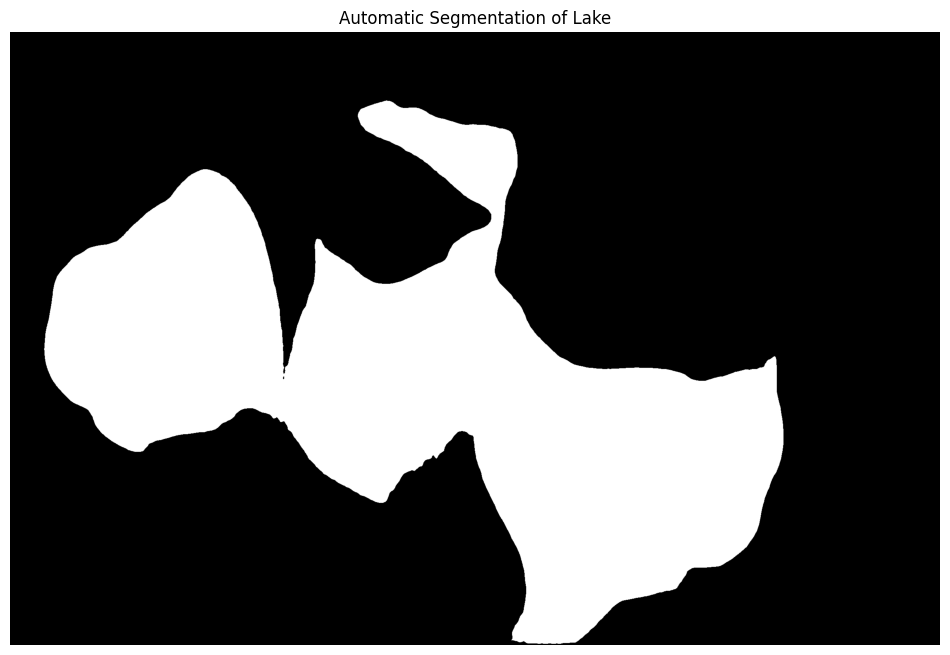

In [12]:
sam.show_anns(
    cmap="Greys_r",
    add_boxes=False,
    alpha=1,
    title="Automatic Segmentation of Lake",
    blend=False,
    output="lake.tif",
)

Convert the result to a vector format.  

In [13]:
sam.raster_to_vector("lake.tif", "lake.gpkg")

Show the results on the interactive map.

In [14]:
m.add_raster("lake.tif", layer_name="Lake", palette="Blues", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("lake.gpkg", layer_name="Vector", style=style)
m

Map(bottom=46634.0, center=[46.4962, 60.7358], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoo…

## Interactive segmentation

In [16]:
sam.show_map()

Map(center=[46.4962, 60.7358], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…